# Chaos

## Driven Damped Pendulum (DDP)

$\ddot \theta + 2\beta \dot \theta + \omega_0^2 \sin(\theta) = \gamma \omega_0^2 \cos(\omega t)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd

from scipy.integrate import odeint, solve_ivp

- non-chaotic motion: $\gamma = 0.9$
- one-period motion: $\gamma = 1.06$
- two-period motion: $\gamma = 1.073$
- three-period motion: $\gamma = 1.077$

In [2]:
def animate_pendulum(theta_0, theta):
    def to_cartesian(theta):
        x = np.sin(theta)
        y = -np.cos(theta)
        return x, y

    x0, y0 = to_cartesian(theta_0)
    bob_radius = 0.08

    fig = plt.figure()
    ax = fig.add_subplot(aspect='equal')
    line, = ax.plot([0, x0], [0, y0], lw=3, c='k')
    circle = ax.add_patch(plt.Circle((x0, y0), bob_radius, fc='r', zorder=3))
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)

    def animate(t):
        x, y = to_cartesian(theta[t])
        line.set_data([0, x], [0, y])
        circle.set_center((x, y))
        return (line, circle)

    animation = FuncAnimation(fig, animate, frames=len(theta),
                                   blit=True, interval=20)

    return animation

In [3]:
def ode(y, t, beta, omega_0, gamma, omega):
    theta, dtheta = y
    dydt = [
        dtheta,
        -2 * beta * dtheta - omega_0**2 * np.sin(theta) + 
        gamma * omega_0**2 * np.cos(omega * t)
        ]
    return dydt

omega = 2 * np.pi
omega_0 = 1.5 * omega
beta = omega_0 / 4

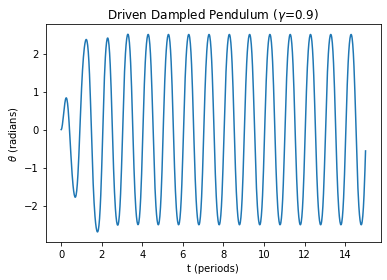

In [39]:
gamma = 0.9
args = (beta, omega_0, gamma, omega)

n_periods = 15
t = np.linspace(0, n_periods, 1000)

theta_0 = 0
dtheta_0 = 0

y0 = [theta_0, dtheta_0]
y = odeint(ode, y0, t, args=args)
theta = y[:, 0]
plt.plot(t, theta)
plt.title(f'Driven Dampled Pendulum ($\gamma$={gamma})')
plt.xlabel('t (periods)')
plt.ylabel(r'$\theta$ (radians)')
plt.show()

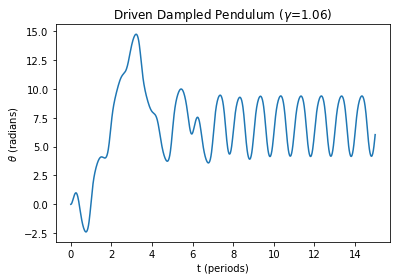

In [40]:
gamma = 1.06
args = (beta, omega_0, gamma, omega)

n_periods = 15
t = np.linspace(0, n_periods, 1000)

theta_0 = 0
dtheta_0 = 0

y0 = [theta_0, dtheta_0]
y = odeint(ode, y0, t, args=args)
theta = y[:, 0]
plt.plot(t, theta)
plt.title(f'Driven Dampled Pendulum ($\gamma$={gamma})')
plt.xlabel('t (periods)')
plt.ylabel(r'$\theta$ (radians)')
plt.show()

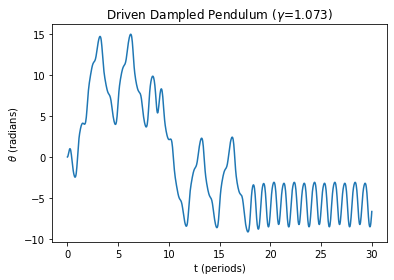

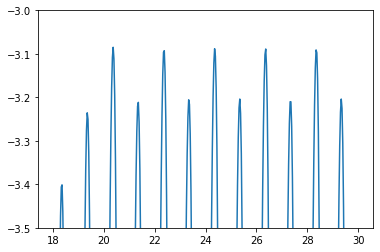

In [41]:
%matplotlib inline

gamma = 1.073
args = (beta, omega_0, gamma, omega)

n_periods = 30
t = np.linspace(0, n_periods, 1000)

theta_0 = 0
dtheta_0 = 0

y0 = [theta_0, dtheta_0]
y = odeint(ode, y0, t, args=args)
theta = y[:, 0]
plt.plot(t, theta)
plt.title(f'Driven Dampled Pendulum ($\gamma$={gamma})')
plt.xlabel('t (periods)')
plt.ylabel(r'$\theta$ (radians)')
plt.show()

plt.plot(t[t > 18], theta[t > 18])
plt.ylim(-3.5, -3)
plt.show()

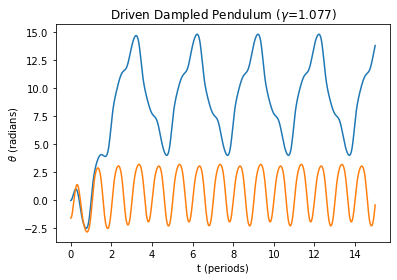

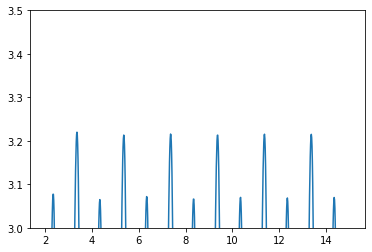

In [42]:
gamma = 1.077
args = (beta, omega_0, gamma, omega)

n_periods = 15
t = np.linspace(0, n_periods, 1000)

dtheta_0 = 0

for theta_0 in [0, -np.pi / 2]:
    y0 = [theta_0, dtheta_0]
    y = odeint(ode, y0, t, args=args)
    theta = y[:, 0]
    plt.plot(t, theta)
plt.title(f'Driven Dampled Pendulum ($\gamma$={gamma})')
plt.xlabel('t (periods)')
plt.ylabel(r'$\theta$ (radians)')
plt.show()

plt.plot(t[t > 2], theta[t > 2])
plt.ylim(3, 3.5)
plt.show()

### Period Doubling Cascade

$\Delta \gamma_{n+1} \approx \frac{1}{\delta} \Delta \gamma_n \text{, where } \delta \approx 4.6692$

$\gamma_n \uparrow \gamma_c$

$\gamma_1 \approx 1.0663$

$\gamma_c \approx 1.0829$

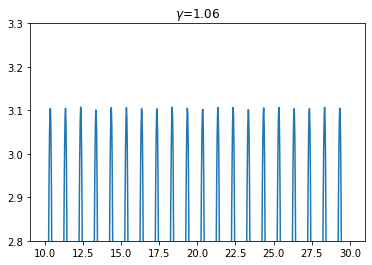

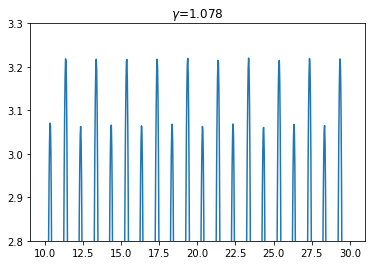

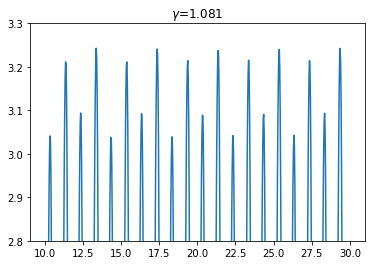

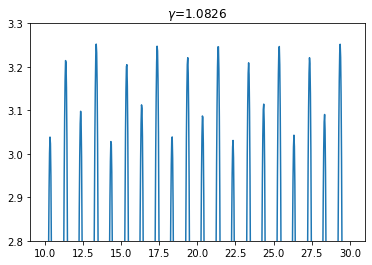

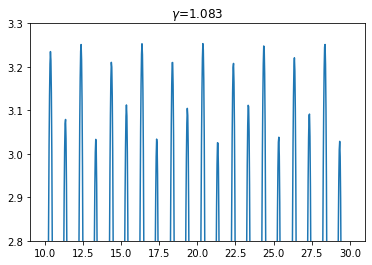

In [43]:
n_periods = 30
t = np.linspace(0, n_periods, 1000)

dtheta_0 = 0
theta_0 = -np.pi / 2
y0 = [theta_0, dtheta_0]

for gamma in [1.06, 1.078, 1.081, 1.0826, 1.0830]:
    args = (beta, omega_0, gamma, omega)
    y = odeint(ode, y0, t, args=args)
    theta = y[:, 0]
    plt.plot(t[t > 10], theta[t > 10])
    plt.title(f'$\gamma$={gamma}')
    plt.ylim(2.8, 3.3)
    plt.show()

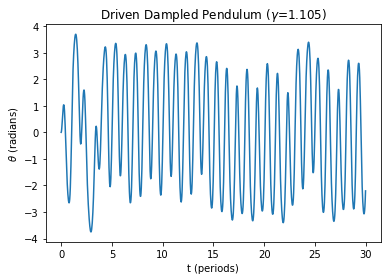

In [44]:
gamma = 1.105
args = (beta, omega_0, gamma, omega)

n_periods = 30
t = np.linspace(0, n_periods, 1000)

theta_0 = 0
dtheta_0 = 0

y0 = [theta_0, dtheta_0]
y = odeint(ode, y0, t, args=args)
theta = y[:, 0]
plt.plot(t, theta)
plt.title(f'Driven Dampled Pendulum ($\gamma$={gamma})')
plt.xlabel('t (periods)')
plt.ylabel(r'$\theta$ (radians)')
plt.show()

<IPython.core.display.Javascript object>


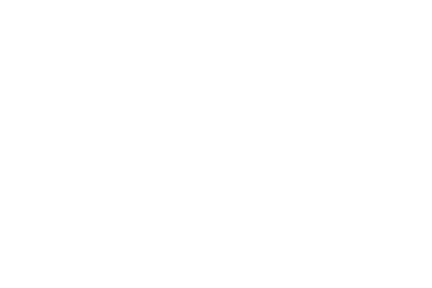

In [45]:
%matplotlib notebook
    
animation = animate_pendulum(theta_0, theta)
plt.show()

In [46]:
%matplotlib inline

### Sensitivity to Initial Conditions

$\Delta \theta(t) = C e^{-\beta t} \cos(\omega' t - \delta)$ for small $\gamma$

$\Delta \theta(t) \sim K e^{\lambda t}$ where
- $\lambda$ is the Liapunov exponent (dimensions inverse time)
- $\lambda > 0$ for chaotic systems (large $\gamma$)
- $\lambda < 0$ for non-chaotic systems (small $\gamma$)

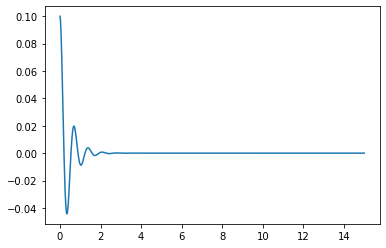

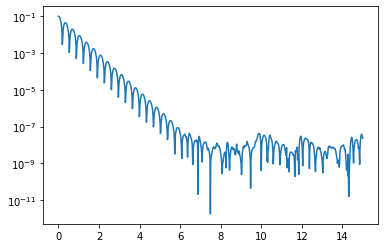

In [47]:
gamma = 0.1
args = (beta, omega_0, gamma, omega)

n_periods = 15
t = np.linspace(0, n_periods, 1000)

theta_0a = 0
dtheta_0a = 0

y0a = [theta_0a, dtheta_0a]
ya = odeint(ode, y0a, t, args=args)
theta_a = ya[:, 0]

theta_0b = 0.1
dtheta_0b = 0

y0b = [theta_0b, dtheta_0b]
yb = odeint(ode, y0b, t, args=args)
theta_b = yb[:, 0]

delta_theta = theta_b - theta_a

plt.plot(t, delta_theta)
plt.show()

plt.semilogy(t, np.abs(delta_theta))
plt.show()

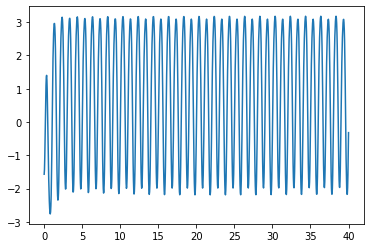

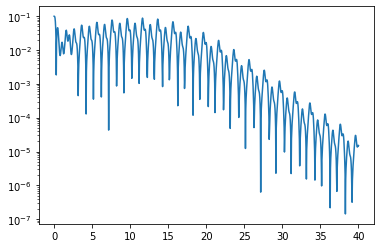

In [48]:
gamma = 1.07
args = (beta, omega_0, gamma, omega)

n_periods = 40
t = np.linspace(0, n_periods, 1000)

theta_0a = -np.pi / 2
dtheta_0a = 0

y0a = [theta_0a, dtheta_0a]
ya = odeint(ode, y0a, t, args=args)
theta_a = ya[:, 0]

theta_0b = theta_0a + 0.1
dtheta_0b = 0

y0b = [theta_0b, dtheta_0b]
yb = odeint(ode, y0b, t, args=args)
theta_b = yb[:, 0]

delta_theta = theta_b - theta_a

plt.plot(t, theta_a)
plt.show()

plt.semilogy(t, np.abs(delta_theta))
plt.show()

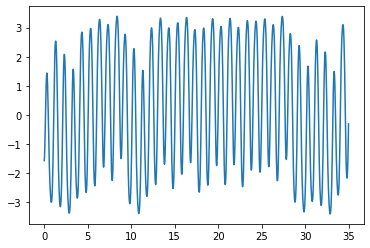

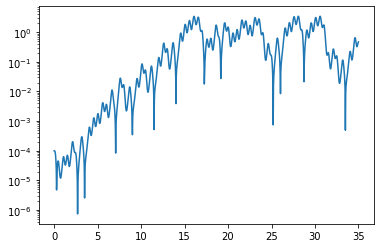

In [49]:
gamma = 1.105
args = (beta, omega_0, gamma, omega)

n_periods = 35
t = np.linspace(0, n_periods, 1000)

theta_0a = -np.pi / 2
dtheta_0a = 0

y0a = [theta_0a, dtheta_0a]
ya = odeint(ode, y0a, t, args=args)
theta_a = ya[:, 0]

theta_0b = theta_0a + 0.0001
dtheta_0b = 0

y0b = [theta_0b, dtheta_0b]
yb = odeint(ode, y0b, t, args=args)
theta_b = yb[:, 0]

delta_theta = theta_b - theta_a

plt.plot(t, theta_a)
plt.show()

plt.semilogy(t, np.abs(delta_theta))
plt.show()

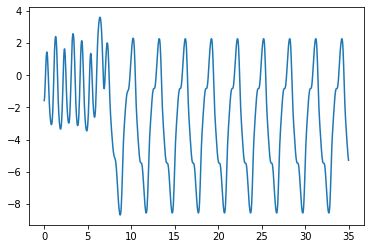

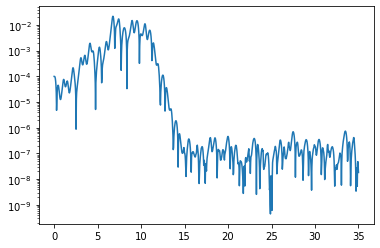

In [50]:
gamma = 1.113
args = (beta, omega_0, gamma, omega)

n_periods = 35
t = np.linspace(0, n_periods, 1000)

theta_0a = -np.pi / 2
dtheta_0a = 0

y0a = [theta_0a, dtheta_0a]
ya = odeint(ode, y0a, t, args=args)
theta_a = ya[:, 0]

theta_0b = theta_0a + 0.0001
dtheta_0b = 0

y0b = [theta_0b, dtheta_0b]
yb = odeint(ode, y0b, t, args=args)
theta_b = yb[:, 0]

delta_theta = theta_b - theta_a

plt.plot(t, theta_a)
plt.show()

plt.semilogy(t, np.abs(delta_theta))
plt.show()

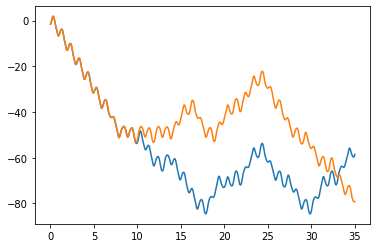

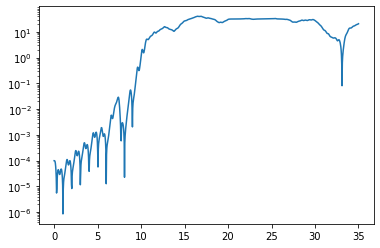

In [51]:
gamma = 1.503
args = (beta, omega_0, gamma, omega)

n_periods = 35
t = np.linspace(0, n_periods, 1000)

theta_0a = -np.pi / 2
dtheta_0a = 0

y0a = [theta_0a, dtheta_0a]
ya = odeint(ode, y0a, t, args=args)
theta_a = ya[:, 0]

theta_0b = theta_0a + 0.0001
dtheta_0b = 0

y0b = [theta_0b, dtheta_0b]
yb = odeint(ode, y0b, t, args=args)
theta_b = yb[:, 0]

delta_theta = theta_b - theta_a

plt.plot(t, theta_a)
plt.plot(t, theta_b)
plt.show()

plt.semilogy(t, np.abs(delta_theta))
plt.show()

<IPython.core.display.Javascript object>


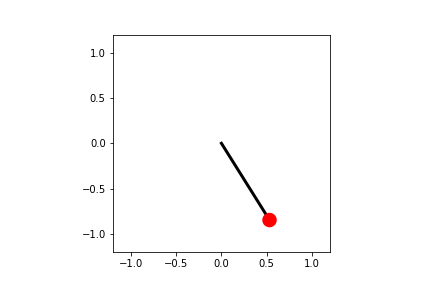

In [54]:
%matplotlib notebook
    
animation = animate_pendulum(theta_0a, theta_a)
plt.show()

In [55]:
%matplotlib inline

### Bifurcation Diagrams

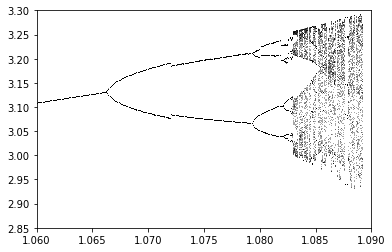

In [27]:
# a better way: make this a function returning ax/fig to plot?

from tqdm.auto import tqdm

gammas = np.linspace(1.04, 1.1, 600)
n_per_period = 1000
n_periods = 600
window = n_periods // 6

fig, ax = plt.subplots()

for gamma in tqdm(gammas):
    args = (beta, omega_0, gamma, omega)
    t = np.linspace(0, n_periods, n_periods * n_per_period)
    theta_0 = -np.pi / 2
    dtheta_0 = 0
    y0 = [theta_0, dtheta_0]
    y = odeint(ode, y0, t, args=args)
    theta = y[:, 0]

    x = theta[-window * n_per_period:]
    argmax = np.argmax(x[-(window * n_per_period):-(window * n_per_period) + n_per_period])
    for point in x[argmax::n_per_period]:
        ax.plot(gamma, point, ',k', alpha=.35)

ax.set_ylim(2.85, 3.3)
ax.set_xlim(1.06, 1.09)
fig

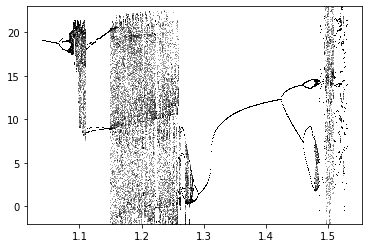

In [29]:
from tqdm.auto import tqdm

gammas = np.linspace(1.04, 1.53, 600)
n_per_period = 1000
n_periods = 600
window = n_periods // 6

fig, ax = plt.subplots()

for gamma in tqdm(gammas):
    args = (beta, omega_0, gamma, omega)
    t = np.linspace(0, n_periods, n_periods * n_per_period)
    theta_0 = -np.pi / 2
    dtheta_0 = 0
    y0 = [theta_0, dtheta_0]
    y = odeint(ode, y0, t, args=args)
    dtheta = y[:, 1]

    x = dtheta[-window * n_per_period:]
    argmax = np.argmax(x[-(window * n_per_period):-(window * n_per_period) + n_per_period])
    for point in x[argmax::n_per_period]:
        ax.plot(gamma, point, ',k', alpha=.35)

ax.set_ylim(-2, 23)
fig

### Phase Space (State Space)

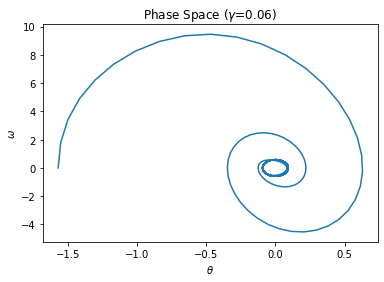

In [30]:
gamma = 0.06
args = (beta, omega_0, gamma, omega)

n_periods = 20
t = np.linspace(0, n_periods, 1000)

theta_0 = -np.pi / 2
dtheta_0 = 0

y0 = [theta_0, dtheta_0]
y = odeint(ode, y0, t, args=args)
theta = y[:, 0]
dtheta = y[:, 1]

plt.plot(theta, dtheta)
plt.title(f'Phase Space ($\gamma$={gamma})')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\omega$')
plt.show()

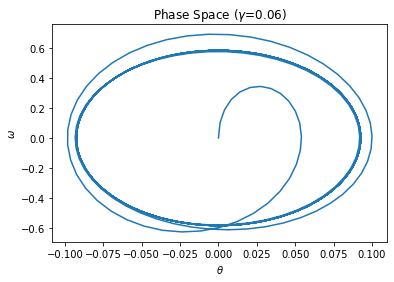

In [34]:
gamma = 0.06
args = (beta, omega_0, gamma, omega)

n_periods = 20
t = np.linspace(0, n_periods, 1000)

theta_0 = 0
dtheta_0 = 0

y0 = [theta_0, dtheta_0]
y = odeint(ode, y0, t, args=args)
theta = y[:, 0]
dtheta = y[:, 1]

plt.plot(theta, dtheta)
plt.title(f'Phase Space ($\gamma$={gamma})')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\omega$')
plt.show()

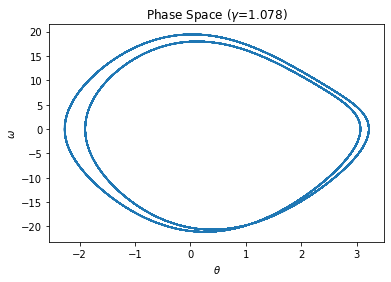

In [70]:
gamma = 1.078
args = (beta, omega_0, gamma, omega)

n_periods = 60
n_per_period = 100
t = np.linspace(0, n_periods, n_periods * n_per_period)

theta_0 = -np.pi / 2
dtheta_0 = 0

y0 = [theta_0, dtheta_0]
y = odeint(ode, y0, t, args=args)
theta = y[:, 0]
dtheta = y[:, 1]

window = 40 * n_per_period

plt.plot(theta[-window:], dtheta[-window:])
plt.title(f'Phase Space ($\gamma$={gamma})')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\omega$')
plt.show()

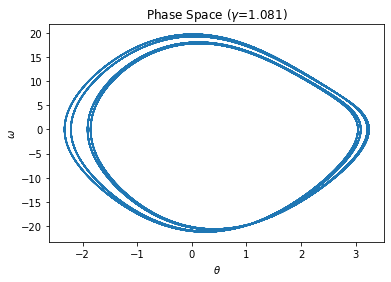

In [71]:
gamma = 1.081
args = (beta, omega_0, gamma, omega)

n_periods = 60
n_per_period = 100
t = np.linspace(0, n_periods, n_periods * n_per_period)

theta_0 = -np.pi / 2
dtheta_0 = 0

y0 = [theta_0, dtheta_0]
y = odeint(ode, y0, t, args=args)
theta = y[:, 0]
dtheta = y[:, 1]

window = 40 * n_per_period

plt.plot(theta[-window:], dtheta[-window:])
plt.title(f'Phase Space ($\gamma$={gamma})')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\omega$')
plt.show()

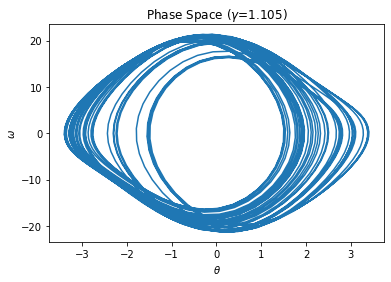

In [72]:
gamma = 1.105
args = (beta, omega_0, gamma, omega)

n_periods = 400
n_per_period = 50
t = np.linspace(0, n_periods, n_periods * n_per_period)

theta_0 = -np.pi / 2
dtheta_0 = 0

y0 = [theta_0, dtheta_0]
y = odeint(ode, y0, t, args=args)
theta = y[:, 0]
dtheta = y[:, 1]

window = 40 * n_per_period

plt.plot(theta[-window:], dtheta[-window:])
plt.title(f'Phase Space ($\gamma$={gamma})')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\omega$')
plt.show()

In [150]:
def mod_neg_pi_to_pi(angle):
    return np.arctan2(np.sin(angle), np.cos(angle))

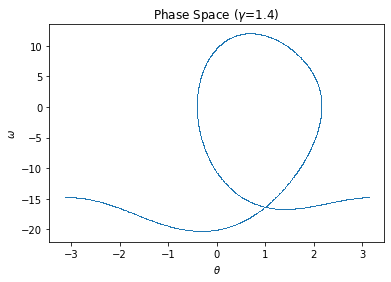

In [149]:
gamma = 1.4
args = (beta, omega_0, gamma, omega)

n_periods = 40
n_per_period = 500
t = np.linspace(0, n_periods, n_periods * n_per_period)

theta_0 = -np.pi / 2
dtheta_0 = 0

y0 = [theta_0, dtheta_0]
y = odeint(ode, y0, t, args=args)
theta = y[:, 0]
dtheta = y[:, 1]

window = 20 * n_per_period

plt.plot(mod_neg_pi_to_pi(theta[-window:]), dtheta[-window:], ',')
plt.title(f'Phase Space ($\gamma$={gamma})')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\omega$')
plt.show()

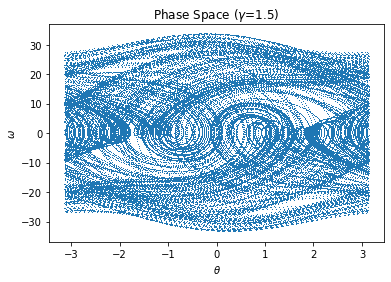

In [148]:
gamma = 1.5
args = (omega_0 / 8, omega_0, gamma, omega)

n_periods = 200
n_per_period = 300
t = np.linspace(0, n_periods, n_periods * n_per_period)

theta_0 = -np.pi / 2
dtheta_0 = 0

y0 = [theta_0, dtheta_0]
y = odeint(ode, y0, t, args=args)
theta = y[:, 0]
dtheta = y[:, 1]

window = 190 * n_per_period

plt.plot(mod_neg_pi_to_pi(theta[-window:]), dtheta[-window:], ',')
plt.title(f'Phase Space ($\gamma$={gamma})')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\omega$')
plt.show()

### Poincare Sections

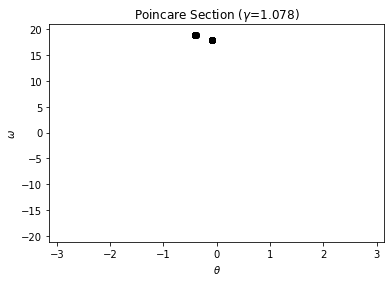

In [158]:
gamma = 1.078
args = (beta, omega_0, gamma, omega)

n_periods = 60
n_per_period = 1000
t = np.linspace(0, n_periods, n_periods * n_per_period)

theta_0 = -np.pi / 2
dtheta_0 = 0

y0 = [theta_0, dtheta_0]
y = odeint(ode, y0, t, args=args)
theta = y[:, 0]
dtheta = y[:, 1]

window = 40 * n_per_period

i0 = len(theta) - window
x, y = [], []
for i in i0 + n_per_period * np.arange(window // n_per_period):
    x.append(mod_neg_pi_to_pi(theta[i]))
    y.append(dtheta[i])

plt.scatter(x, y, c='black')
plt.title(f'Poincare Section ($\gamma$={gamma})')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\omega$')
plt.xlim(-np.pi, np.pi)
plt.ylim(dtheta.min(), dtheta.max())
plt.show()

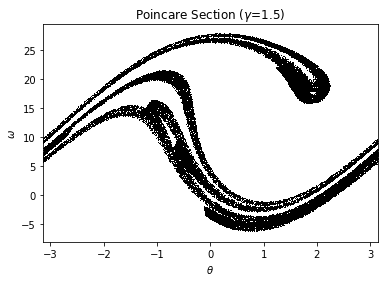

In [172]:
gamma = 1.5
args = (omega_0 / 8, omega_0, gamma, omega)

n_periods = 60000
n_per_period = 100
t = np.linspace(0, n_periods, n_periods * n_per_period)

theta_0 = -np.pi / 2
dtheta_0 = 0

y0 = [theta_0, dtheta_0]
y = odeint(ode, y0, t, args=args)
theta = y[:, 0]
dtheta = y[:, 1]

window = (n_periods - 10) * n_per_period

i0 = len(theta) - window
x, y = [], []
for i in i0 + n_per_period * np.arange(window // n_per_period):
    x.append(mod_neg_pi_to_pi(theta[i]))
    y.append(dtheta[i])

plt.plot(x, y, ',k')
plt.title(f'Poincare Section ($\gamma$={gamma})')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\omega$')
plt.xlim(-np.pi, np.pi)
plt.show()

## Logistic Map

Iterated Map: $n_{t+1} = f(n_t)$, or $n_0 \xrightarrow{f} n_1 \xrightarrow{f} n_2 \xrightarrow{f} \cdots$

Exponential Map: $n_{t+1} = r n_t$

Logistic Map: $n_{t+1} = r n_t (1-\frac{n_t}{N})$
- Change of variables: $x_{t+1} = r x_t (1 - x_t)$ where $x \equiv \frac{n}{N}$
- $0 \leq x \leq 1$, $0 \leq r \leq 4$
- max at $f(1/2) = 1/4$
- fixed points: $f(x^*) = x^*$
- stable if $|f(x^*)|<1$ else unstable
- for logistic map: $x^* = 0, 1 - \frac{1}{r}$
- stability at $x^* = 0$: $r < 1$
- stability at $x^* = 1 - \frac{1}{r}$: $1 < r < 3$

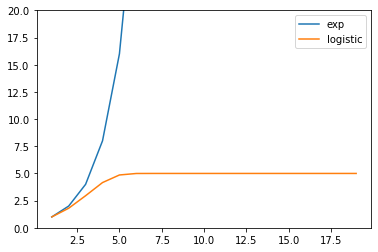

In [190]:
N = 10
r = 2

t = np.arange(1, 2 * N)
n_exp = np.zeros(len(t))
n_log = np.zeros(len(t))
n_exp[0] = 1
n_log[0] = 1
for i in t[:-1]:
    n_exp[i] = r * n_exp[i-1]
    n_log[i] = r * n_log[i-1] * (1 - n_log[i-1] / N)

plt.plot(t, n_exp, label='exp')
plt.plot(t, n_log, label='logistic')
plt.ylim(0, 2 * N)
plt.legend()
plt.show()

In [251]:
def logistic_map(t, x0, r):
    x = x0
    array = []
    for i in t:
        array.append(x)
        x = r * x * (1 - x)
    return np.array(array)

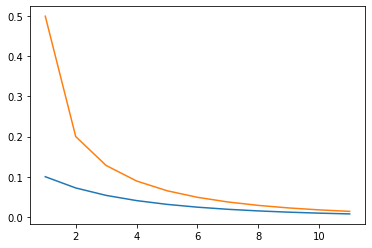

In [252]:
r = 0.8
t = np.arange(1, 12)

x1 = logistic_map(t, 0.1, r)
x2 = logistic_map(t, 0.5, r)

plt.plot(t, x1)
plt.plot(t, x2)
plt.show()

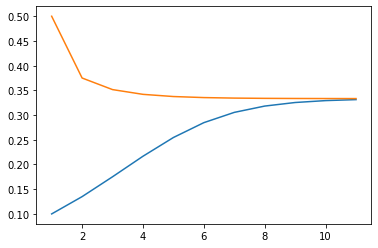

In [253]:
r = 1.5
t = np.arange(1, 12)

x1 = logistic_map(t, 0.1, r)
x2 = logistic_map(t, 0.5, r)

plt.plot(t, x1)
plt.plot(t, x2)
plt.show()

0.0


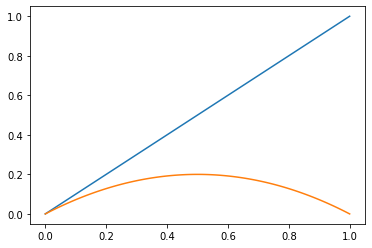

In [210]:
from scipy.optimize import fsolve

r = 0.8
x = np.linspace(0, 1, 100)
f = lambda x: r * x * (1 - x) - x

guess = 1
fixed_point = fsolve(f, guess)[0]; print(fixed_point)

plt.plot(x, x)
plt.plot(x, f(x) + x)
plt.show()

0.0
0.33333333333333326


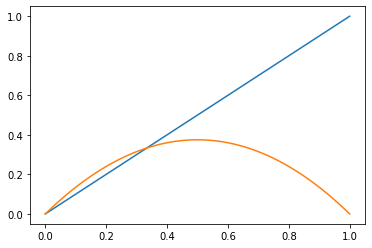

In [207]:
from scipy.optimize import fsolve

r = 1.5
x = np.linspace(0, 1, 100)
f = lambda x: r * x * (1 - x) - x

guess = 0
fixed_point = fsolve(f, guess)[0]; print(fixed_point)

guess = 1
fixed_point = fsolve(f, guess)[0]; print(fixed_point)

plt.plot(x, x)
plt.plot(x, f(x) + x)
plt.show()

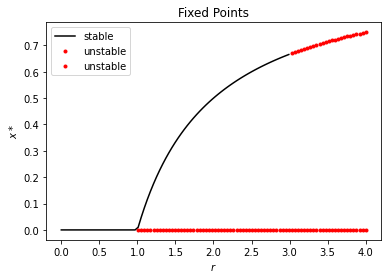

In [224]:
fixed_points = []
params = np.linspace(0, 4, 100)
for r in params:
    x = np.linspace(0, 1, 100)
    f = lambda x: r * x * (1 - x) - x
    fixed_point = fsolve(f, 1)[0]
    fixed_points.append(fixed_point)
fixed_points = np.array(fixed_points)

plt.plot(params[params < 3], fixed_points[params < 3], 'k', label='stable')
plt.plot(params[params > 3], fixed_points[params > 3], '.r', label='unstable')
plt.plot(params[params > 1], 0 * params[params > 1], '.r', label='unstable')
plt.xlabel('$r$')
plt.ylabel('$x*$')
plt.title('Fixed Points')
plt.legend()
plt.show()

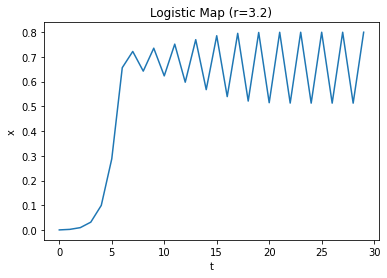

In [267]:
r = 3.2
t = np.arange(0, 30)
x0 = 0.001
x = logistic_map(t, x0, r)

plt.plot(t, x)
plt.title(f'Logistic Map (r={r})')
plt.xlabel('t')
plt.ylabel('x')
plt.show()

Double Iterated Map: 
- $g(x) = f(f(x))$
- $x_{t+2} = r x_t (1 - x_t)$
- fixed points of $g$: $x^*$, $x_a$, $x_b$ if $r>3$

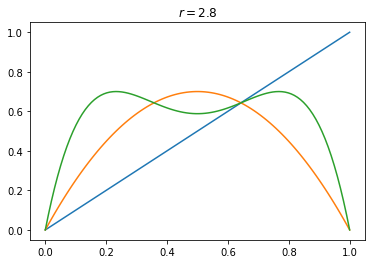

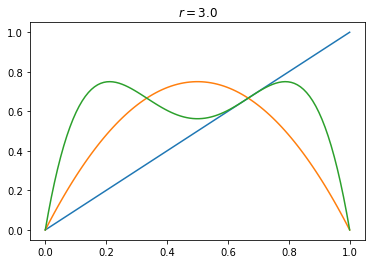

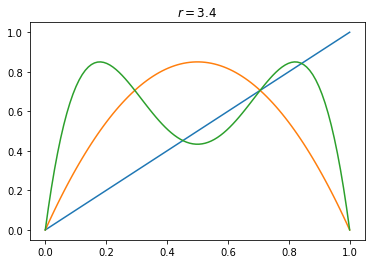

In [258]:
x0 = 0.001
x = np.linspace(0, 1, 100)

for r in [2.8, 3.0, 3.4]:
    f = lambda x: r * x * (1 - x)
    g = lambda x: f(f(x))
    plt.plot(x, x)
    plt.plot(x, f(x))
    plt.plot(x, g(x))
    plt.title(f'$r=${r}')
    plt.show()

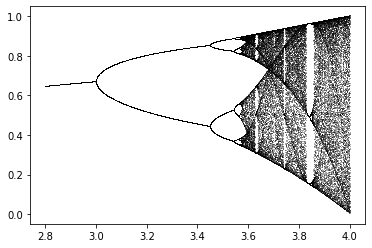

In [260]:
from tqdm.auto import tqdm

params = np.linspace(2.8, 4, 1200)
n_periods = 1000
window = 100

fig, ax = plt.subplots()

for r in tqdm(params):
    t = np.linspace(0, n_periods, n_periods)
    x0 = 0.001
    x = logistic_map(t, x0, r)

    x_steady = x[-window:]
    for point in x_steady:
        ax.plot(r, point, ',k', alpha=.35)

fig

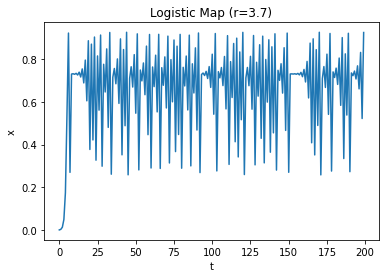

In [266]:
r = 3.7
t = np.arange(0, 200)
x0 = 0.001
x = logistic_map(t, x0, r)

plt.plot(t, x)
plt.title(f'Logistic Map (r={r})')
plt.xlabel('t')
plt.ylabel('x')
plt.show()

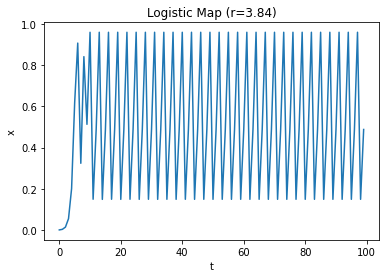

In [265]:
r = 3.84
t = np.arange(0, 100)
x0 = 0.001
x = logistic_map(t, x0, r)

plt.plot(t, x)
plt.title(f'Logistic Map (r={r})')
plt.xlabel('t')
plt.ylabel('x')
plt.show()